In [23]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df['Postal Code'] = df['Postal Code'].fillna(int('05401'))

In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df = df.sort_values(by='Order Date')

In [9]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 7980 to 5091
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 non

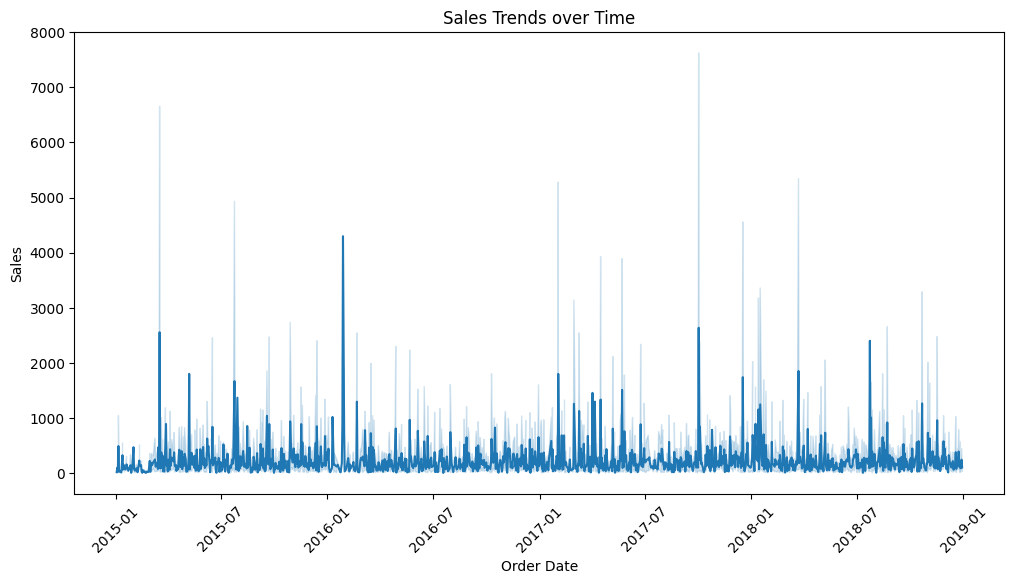

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(df, x='Order Date', y='Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Trends over Time')
plt.xticks(rotation=45)

plt.show()

## Rolling Averages to Smooth Trends

In [12]:
df['Daily Total'] = df.groupby('Order Date')['Sales'].transform(lambda x: x.sum())

In [13]:
df[['Order Date', 'Sales', 'Daily Total']][:5]

,Order Date,Sales,Daily Total
7980,2015-01-03,16.448,16.448
741,2015-01-04,3.540,288.060
740,2015-01-04,272.736,288.060
739,2015-01-04,11.784,288.060
1759,2015-01-05,19.536,19.536


In [18]:
df_Daily_Total = df[['Order Date', 'Daily Total']]
df_Daily_Total = df_Daily_Total.drop_duplicates()

In [19]:
df_Daily_Total['rolling 7'] = df_Daily_Total['Daily Total'].rolling(window=7).mean()
df_Daily_Total['rolling 30'] = df_Daily_Total['Daily Total'].rolling(window=30).mean()

In [20]:
df_Daily_Total[:31]

,Order Date,Daily Total,rolling 7,rolling 30
7980,2015-01-03,16.448,NaN,NaN
741,2015-01-04,288.060,NaN,NaN
1759,2015-01-05,19.536,NaN,NaN
7478,2015-01-06,4407.100,NaN,NaN
7661,2015-01-07,87.158,NaN,NaN
593,2015-01-09,40.544,NaN,NaN
866,2015-01-10,54.830,701.953714,NaN
716,2015-01-11,9.940,701.024000,NaN
763,2015-01-13,3553.795,1167.557571,NaN
6474,2015-01-14,61.960,1173.618143,NaN


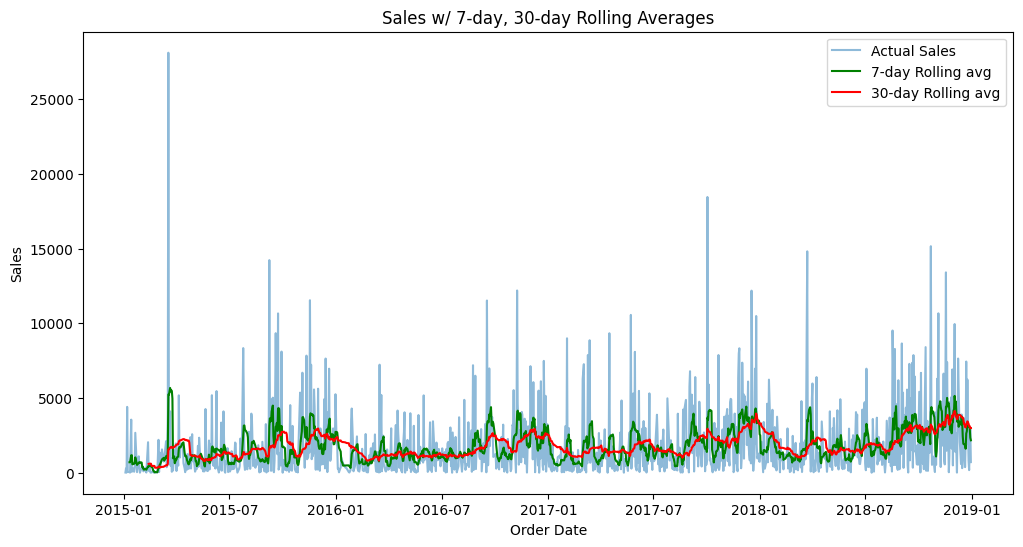

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(df_Daily_Total, x='Order Date', y='Daily Total', label='Actual Sales', alpha=0.5)
sns.lineplot(df_Daily_Total, x='Order Date', y='rolling 7', label='7-day Rolling avg', color='green')
sns.lineplot(df_Daily_Total, x='Order Date', y='rolling 30', label='30-day Rolling avg', color='red')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales w/ 7-day, 30-day Rolling Averages')
plt.legend()

plt.show()

## Sales by Month

In [25]:
df['Month'] = df['Order Date'].dt.month

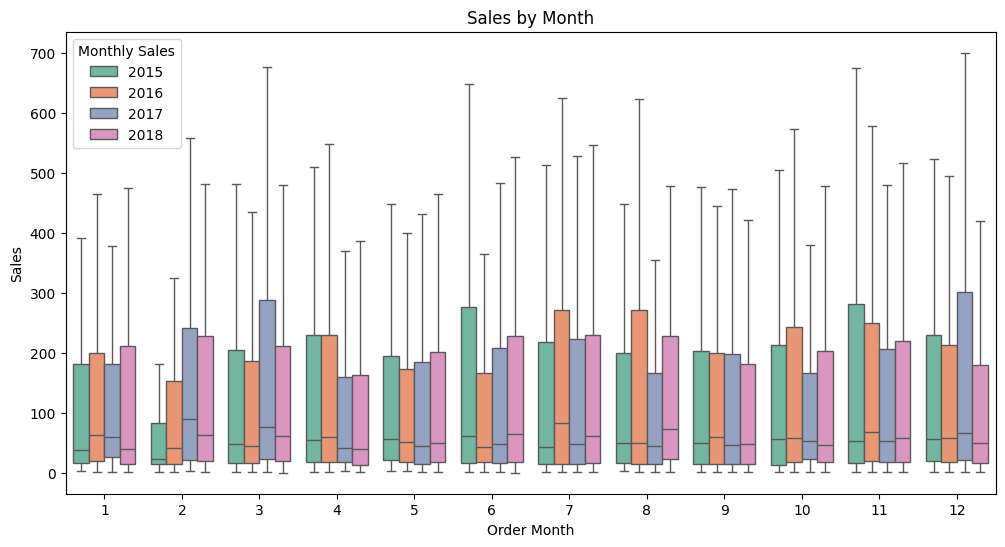

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(df, x='Month', y='Sales', hue=df['Order Date'].dt.year, palette='Set2', showfliers=False)
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.legend(title='Monthly Sales')

plt.show()

## Sales by Day of the Week

In [34]:
df['Day'] = df['Order Date'].dt.day_name()

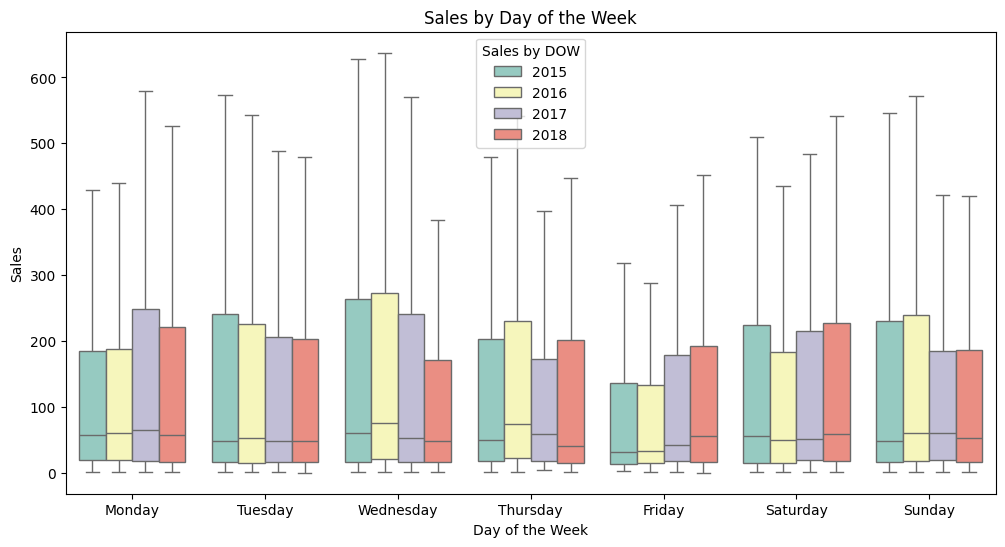

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(df, x='Day', y='Sales', hue=df['Order Date'].dt.year, palette='Set3', showfliers=False,
           order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.title('Sales by Day of the Week')
plt.legend(title='Sales by DOW')

plt.show()

## Year-over-Year Sales

In [54]:
df['Year'] = df['Order Date'].dt.year
df['Month Day'] = df['Order Date'].dt.strftime('%m-%d')
df_2018 = df[df['Order Date'].dt.year == 2018]

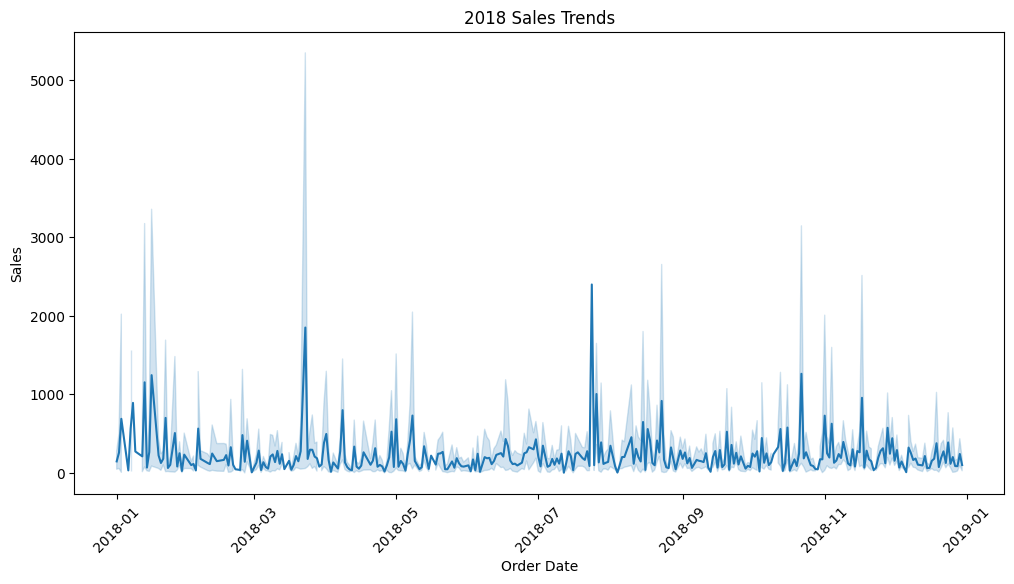

In [57]:
plt.figure(figsize=(12,6))
sns.lineplot(df_2018, x='Order Date', y='Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('2018 Sales Trends')
plt.xticks(rotation=45)

plt.show()

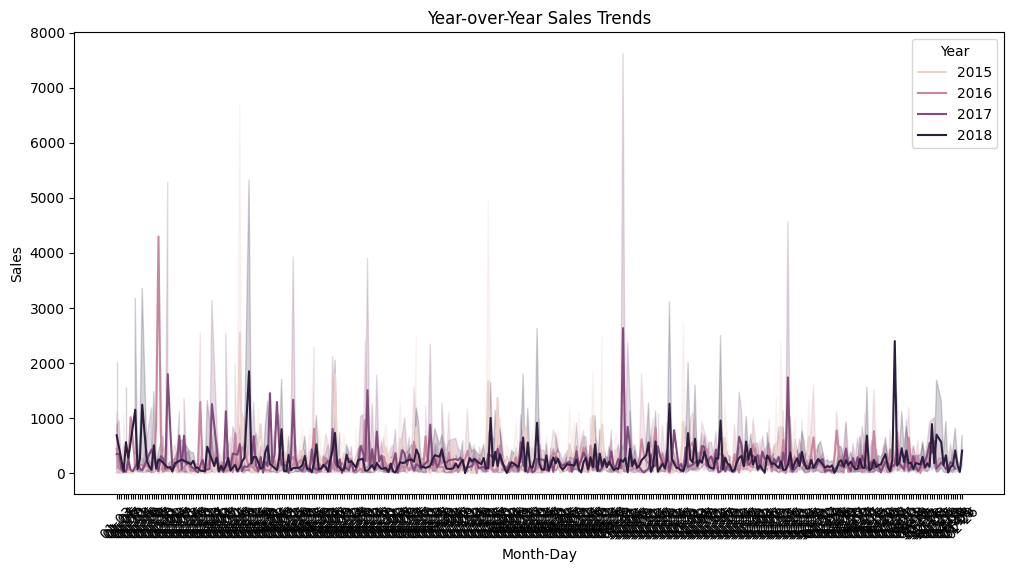

In [58]:
plt.figure(figsize=(12,6))
sns.lineplot(df, x='Month Day', y='Sales', hue='Year')
plt.xlabel('Month-Day')
plt.ylabel('Sales')
plt.title('Year-over-Year Sales Trends')
plt.xticks(rotation=45)
plt.legend(title='Year')

plt.show()

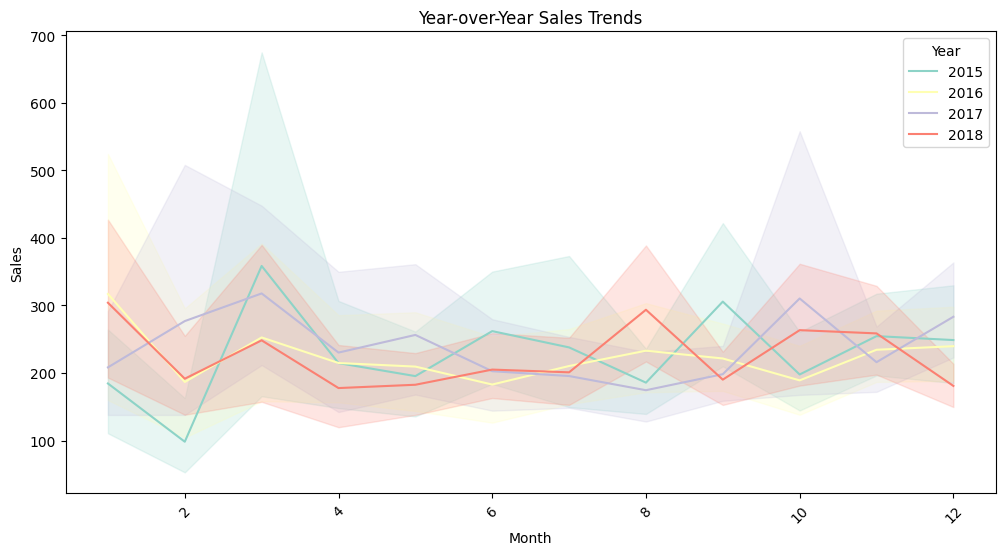

In [59]:
plt.figure(figsize=(12,6))
sns.lineplot(df, x='Month', y='Sales', hue='Year', palette='Set3')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Year-over-Year Sales Trends')
plt.xticks(rotation=45)
plt.legend(title='Year')

plt.show()